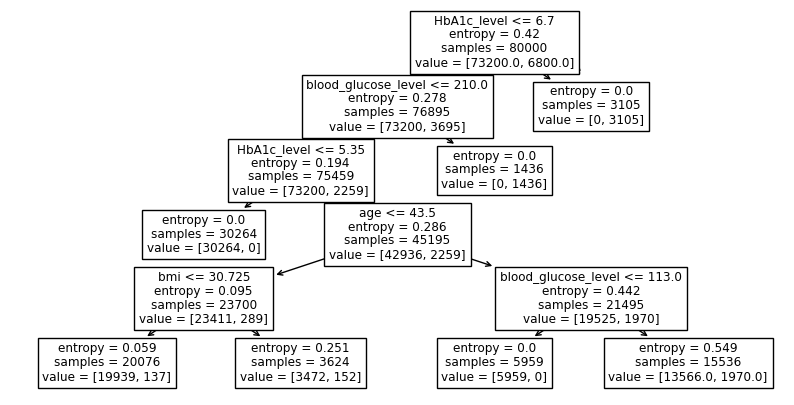

ID3 Decision Tree Accuracy: 0.9723

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       1.00      0.67      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



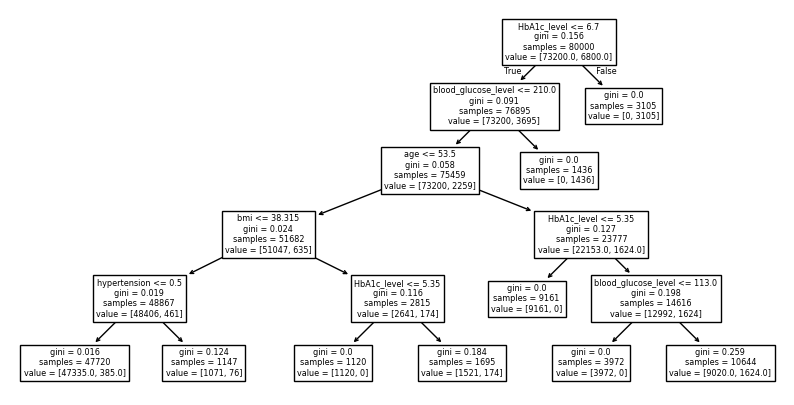

CART (Gini) Decision Tree Accuracy: 0.9723

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       1.00      0.67      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



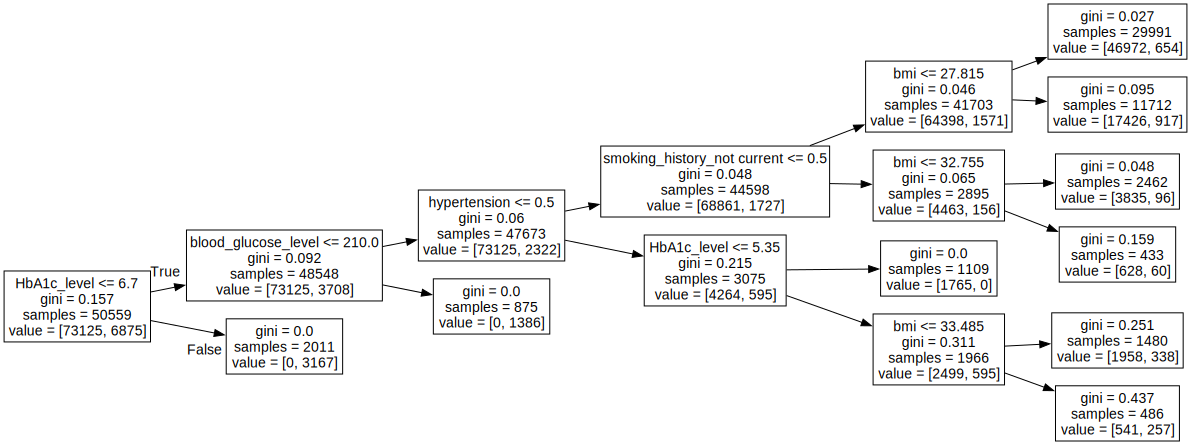

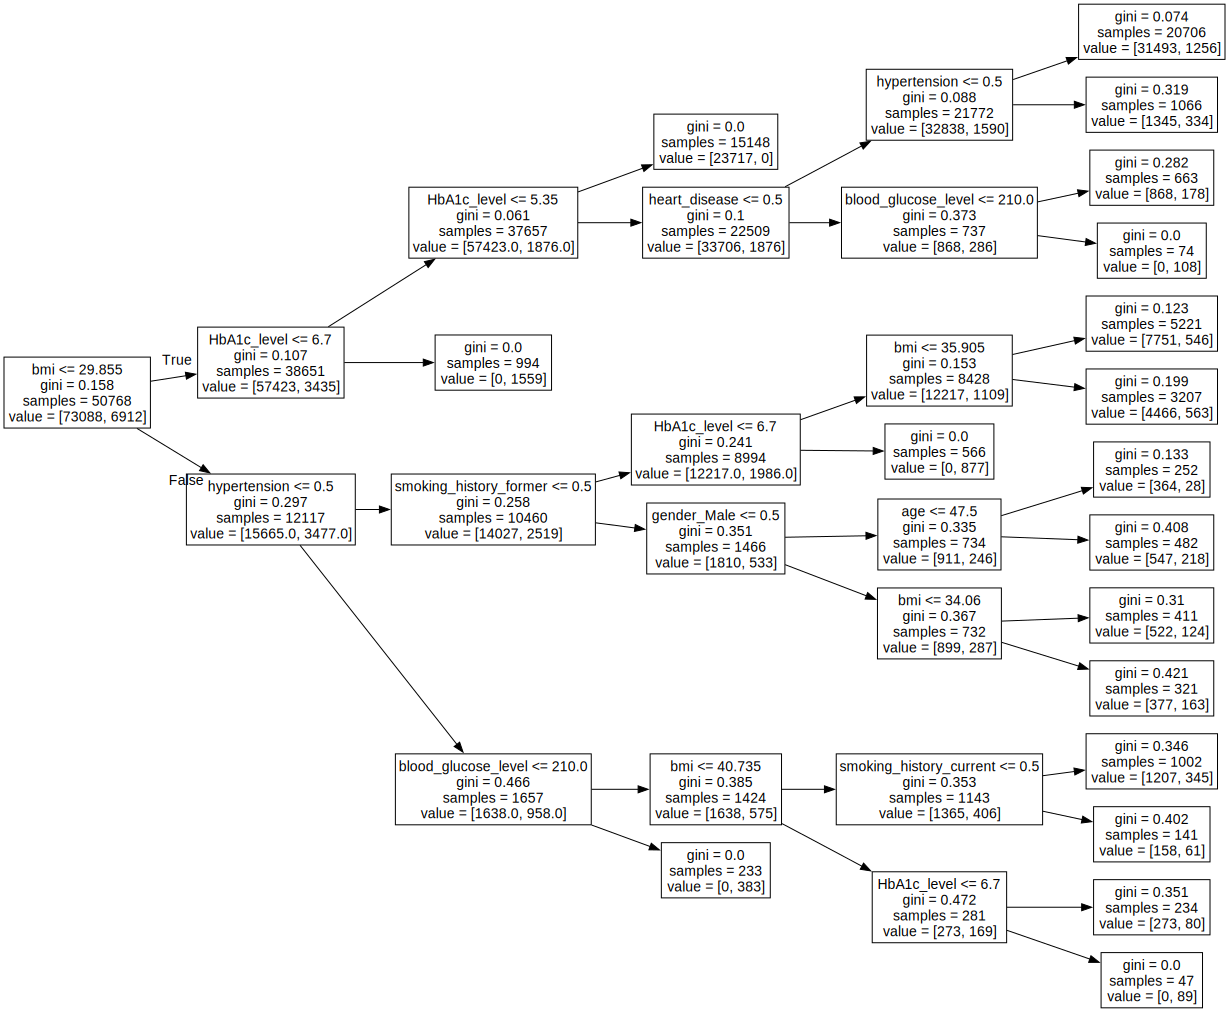

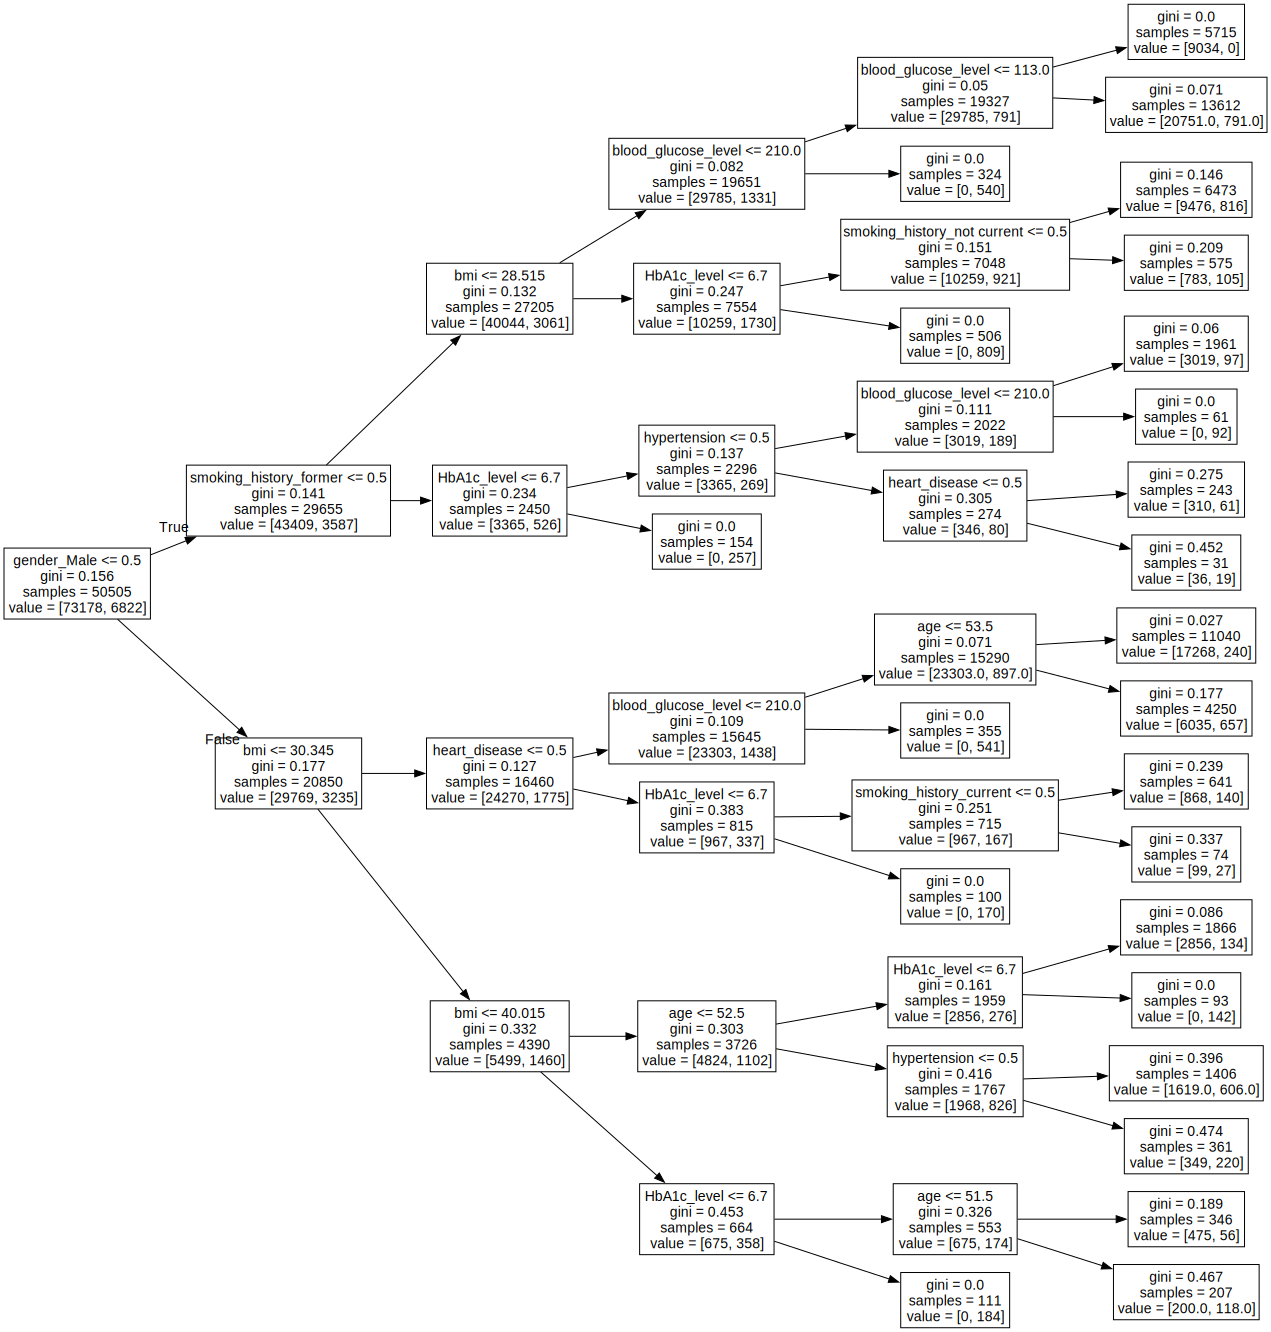

Random Forest Accuracy: 0.9723

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       1.00      0.67      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



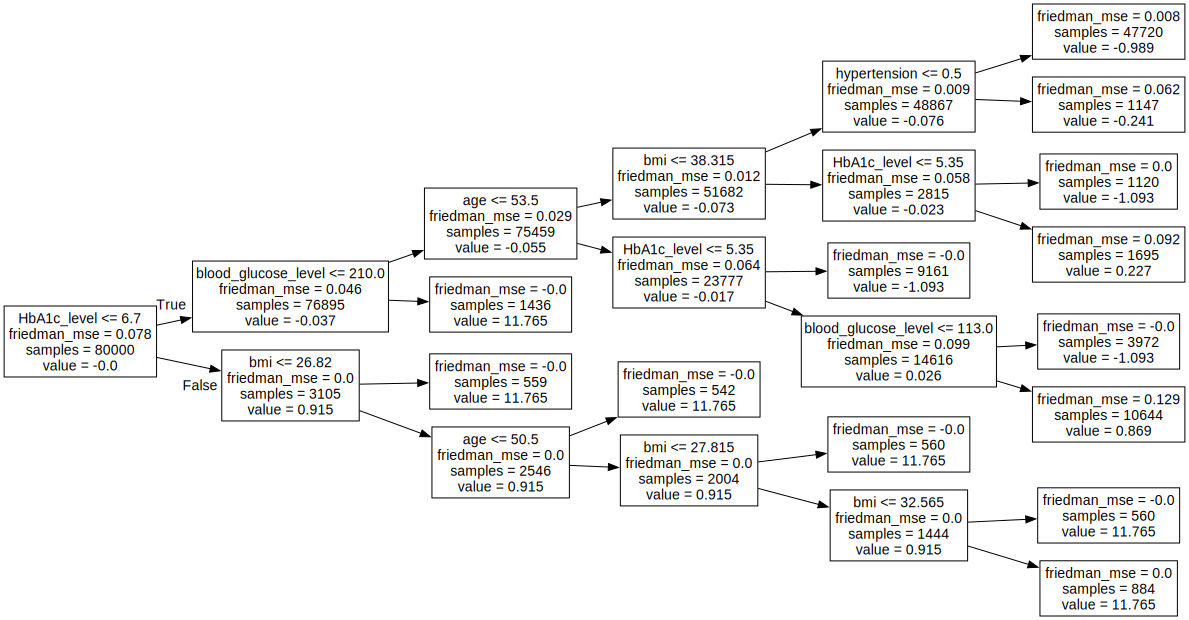

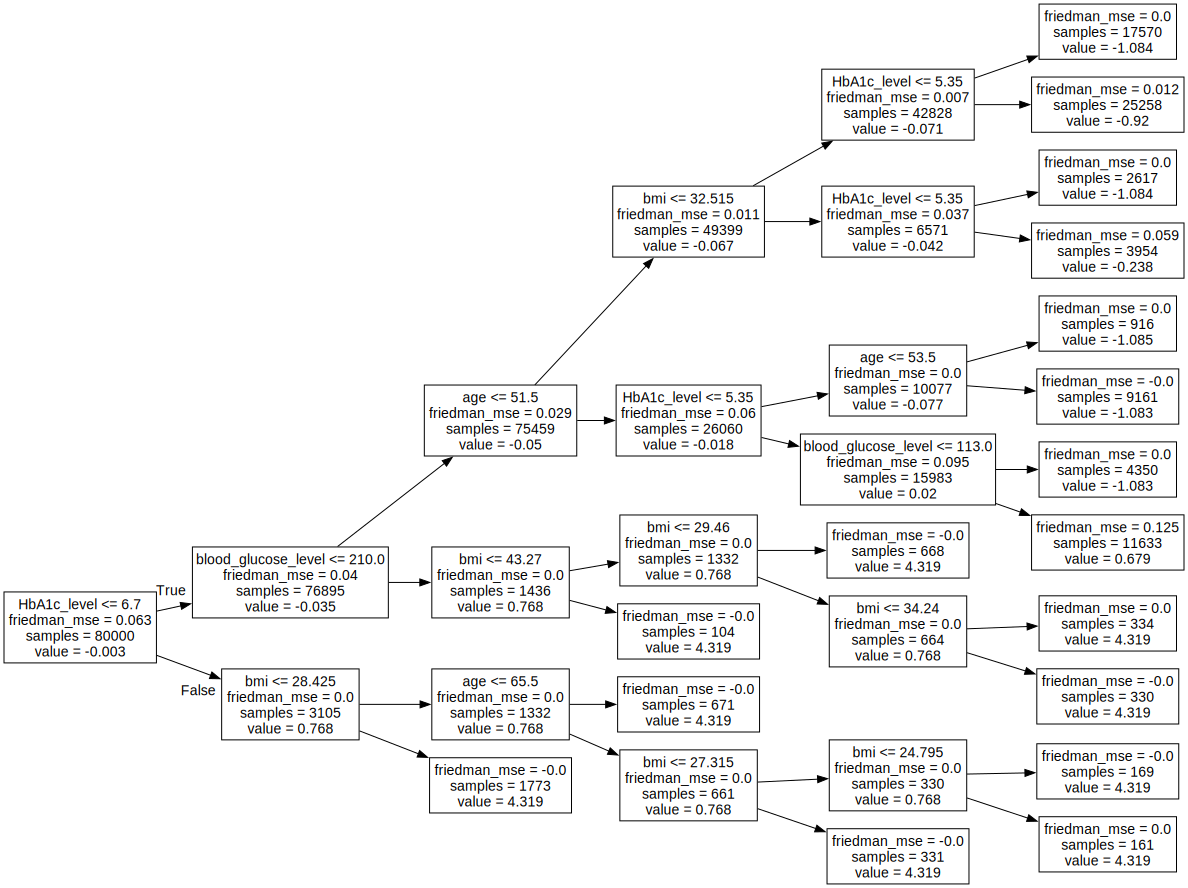

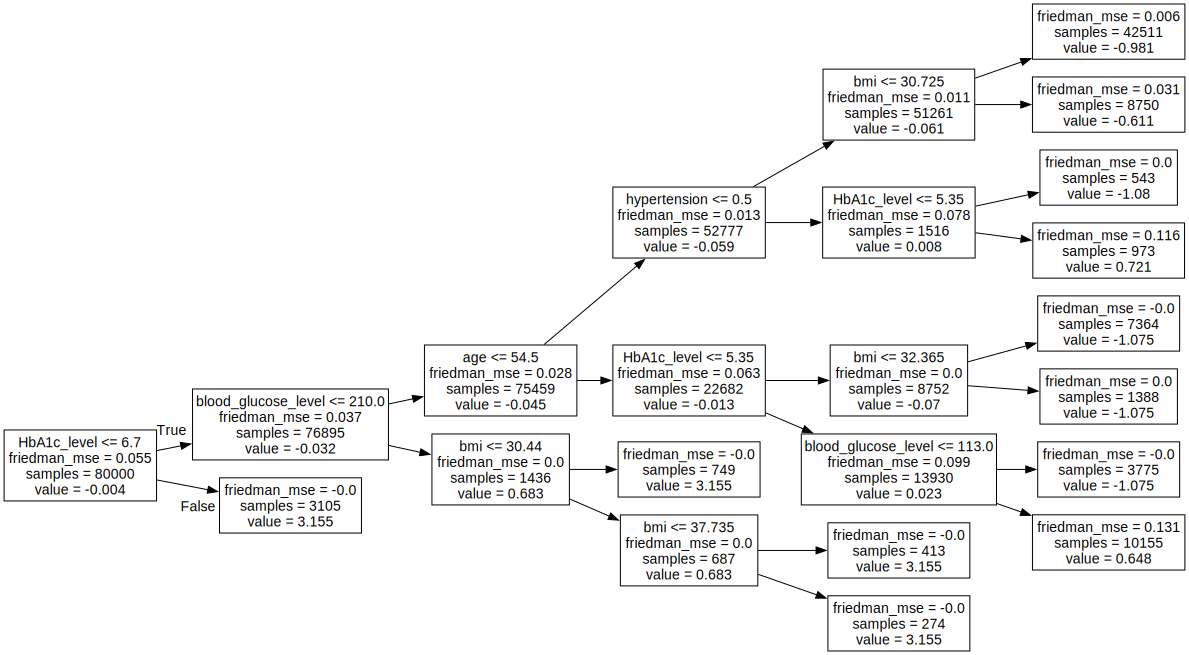

Gradient Boosted Trees Accuracy: 0.97265

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.98      0.69      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



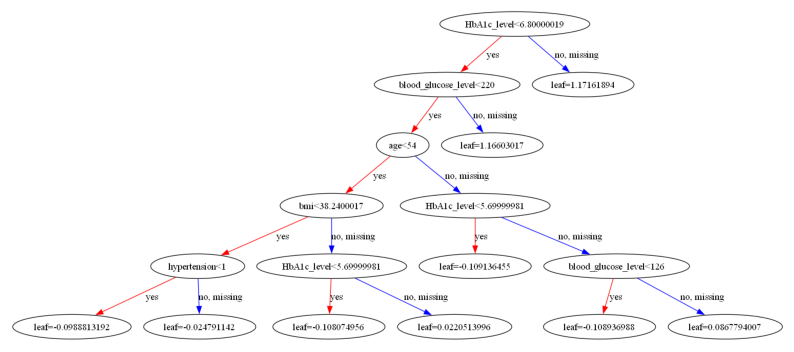

XGBoost Accuracy: 0.97245

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.98      0.69      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

               Model  Test Accuracy  Cross-Val Accuracy
0      ID3 (Entropy)        0.97230             0.97187
1        CART (Gini)        0.97230             0.97187
2      Random Forest        0.97230             0.97187
3  Gradient Boosting        0.97265             0.97191
4            XGBoost        0.97245             0.97169


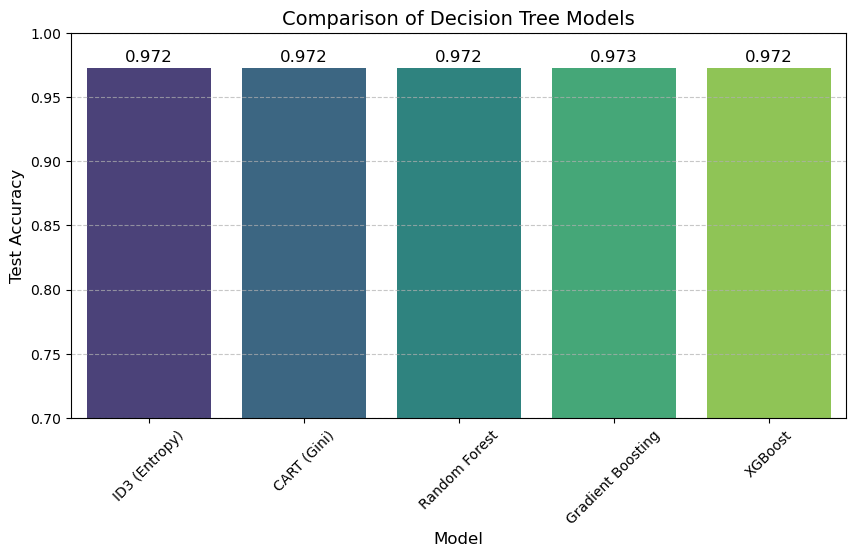

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import graphviz
import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = pd.read_csv("../raw_data/kaggle_dataset.csv")

# Handle categorical variables
data = pd.get_dummies(data, columns=["gender", "smoking_history"], drop_first=True)

# Define features and target variable
X = data.drop("diabetes", axis=1)
y = data["diabetes"]

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    scores = cross_val_score(model, np.array(X), np.array(y), cv=kf, scoring='accuracy')  
    return scores.mean()


# ID3 (Entropy)
id3_clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    random_state=42
)
id3_clf.fit(X_train, y_train)
id3_preds = id3_clf.predict(X_test)

id3_acc = accuracy_score(y_test, id3_preds)
id3_cross_val = evaluate_model(id3_clf, X, y)

plt.figure(figsize=(10, 5))
plot_tree(id3_clf, feature_names=X_train.columns)
plt.show()

print("ID3 Decision Tree Accuracy:", id3_acc)
print("\nClassification Report:")
print(classification_report(y_test, id3_preds))

# CART (Gini)
cart_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)
cart_clf.fit(X_train, y_train)
cart_preds = cart_clf.predict(X_test)

cart_acc = accuracy_score(y_test, cart_preds)
cart_cross_val = evaluate_model(cart_clf, X, y)

plt.figure(figsize=(10, 5))
plot_tree(cart_clf, feature_names=X_train.columns)
plt.show()

print("CART (Gini) Decision Tree Accuracy:", cart_acc)
print("\nClassification Report:")
print(classification_report(y_test, cart_preds))

# Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
rf_cross_val = evaluate_model(rf_clf, X, y)

for i in range(3):
    gv = export_graphviz(rf_clf.estimators_[i], feature_names=X_train.columns, rotate=True, out_file=None)
    g = graphviz.Source(gv)
    display(g)

print("Random Forest Accuracy:", rf_acc)
print("\nClassification Report:")
print(classification_report(y_test, rf_preds))

# Gradient Boosting
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_test)

gb_acc = accuracy_score(y_test, gb_preds)
gb_cross_val = evaluate_model(gb_clf, X, y)

for i in range(3):
    gv = export_graphviz(gb_clf.estimators_[i][0], feature_names=X_train.columns, rotate=True, out_file=None)
    g = graphviz.Source(gv)
    display(g)


print("Gradient Boosted Trees Accuracy:", gb_acc)
print("\nClassification Report:")
print(classification_report(y_test, gb_preds))

# XGBoost
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False
)

xgb_clf.fit(X_train, y_train)
xgb_preds = xgb_clf.predict(X_test)

xgb_acc = accuracy_score(y_test, xgb_preds)
xgb_cross_val = evaluate_model(
    xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=10,
        random_state=42
    ),
    X, y
)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
xgb.plot_tree(booster=xgb_clf, ax=ax)
plt.show()

print("XGBoost Accuracy:", xgb_acc)
print("\nClassification Report:")
print(classification_report(y_test, xgb_preds))

# Compare model performance
models = ["ID3 (Entropy)", "CART (Gini)", "Random Forest", "Gradient Boosting", "XGBoost"]
accuracies = [id3_acc, cart_acc, rf_acc, gb_acc, xgb_acc]
cross_val_scores = [id3_cross_val, cart_cross_val, rf_cross_val, gb_cross_val, xgb_cross_val]

results_df = pd.DataFrame({"Model": models, "Test Accuracy": accuracies, "Cross-Val Accuracy": cross_val_scores})

print(results_df)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df["Model"], y=results_df["Test Accuracy"], palette="viridis")

plt.ylim(0.7, 1)
for index, value in enumerate(results_df["Test Accuracy"]):
    plt.text(index, value + 0.005, f"{value:.3f}", ha='center', fontsize=12)

plt.xlabel("Model", fontsize=12)
plt.ylabel("Test Accuracy", fontsize=12)
plt.title("Comparison of Decision Tree Models", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
